In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
df = pd.read_csv("creditcard.csv")
df.head(500)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,365.0,-1.209437,0.949446,-0.429811,-2.640094,2.601387,3.056966,0.473495,0.280729,0.853043,...,-0.214920,-0.449815,-0.088677,1.030439,-0.048967,0.671979,-0.612153,-0.224000,0.68,0
496,366.0,-1.185698,-0.386510,1.623072,1.636406,1.102506,-0.683317,-0.303337,0.285653,-0.056085,...,0.068753,-0.006952,0.040889,0.040937,0.009224,-0.201042,0.106580,0.140465,9.99,0
497,366.0,1.020399,-0.639479,0.941568,0.121307,-0.996320,0.177803,-0.589656,0.153583,0.835979,...,-0.140624,-0.341663,-0.060548,0.116672,0.144624,0.932850,-0.049522,0.018131,97.47,0
498,367.0,1.256217,0.255028,0.277716,0.706677,-0.495831,-1.106735,-0.008493,-0.124504,0.243687,...,-0.303927,-0.943830,0.146551,0.307164,0.169070,0.099129,-0.032095,0.027743,1.29,0


In [35]:
print(df['Class'].unique())

[0 1]


Class
0    284315
1       492
Name: count, dtype: int64
Taux de fraude : 0.172749%


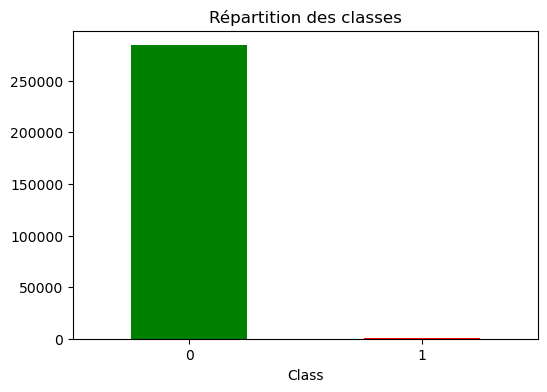

In [37]:
# Répartition normal / fraude
class_counts = df['Class'].value_counts()
print(class_counts)

# % de fraudes
fraud_rate = class_counts[1] / class_counts.sum()
print(f"Taux de fraude : {fraud_rate:.6%}")

# Visualisation
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Répartition des classes')
plt.xticks(rotation=0)
plt.show()

C:\Users\aboub\AppData\Local\Temp\ipykernel_31528\2818247459.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


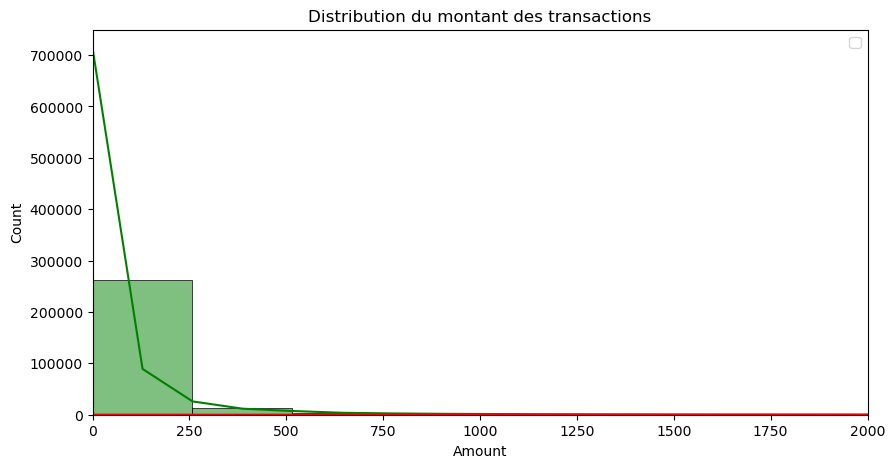

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, color='green', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='red', kde=True)
plt.legend()
plt.title('Distribution du montant des transactions')
plt.xlim([0, 2000])  # pour lisibilité
plt.show()

C:\Users\aboub\AppData\Local\Temp\ipykernel_31528\2502145987.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


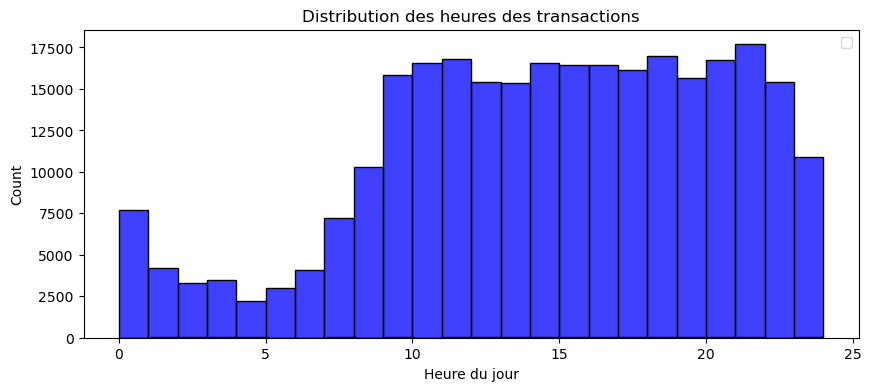

In [49]:
# Convertir 'Time' en heures (si souhaité)
df['Hour'] = (df['Time'] / 3600) % 24

plt.figure(figsize=(10, 4))
sns.histplot(df[df['Class'] == 0]['Hour'], bins=24, color='blue', kde=False)
sns.histplot(df[df['Class'] == 1]['Hour'], bins=24, color='orange', kde=False)
plt.legend()
plt.title('Distribution des heures des transactions')
plt.xlabel('Heure du jour')
plt.show()


In [51]:
# Sélectionner aléatoirement 10 000 transactions normals
t_n = df[df['Class'] == 0].sample(n=1000, random_state=42)

# Sélectionner aléatoirement 10 000 transactions frauduleuses
t_f = df[df['Class'] == 1].sample(n=492, random_state=42)

# Concaténer les tweets positifs et négatifs sélectionnés
df_select = pd.concat([t_n, t_f])

# Réinitialiser les index
df_select = df_select.reset_index(drop=True)
df_select

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0,22.902778
1,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0,14.042778
2,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0,15.312500
3,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0,8.381111
4,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0,1.120556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1,11.295000
1488,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1,23.552500
1489,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1,4.521111
1490,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1,17.705000


Class
0    1000
1     492
Name: count, dtype: int64
Taux de fraude : 32.975871%


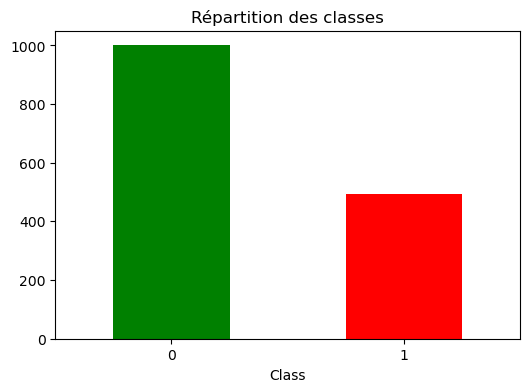

In [53]:
# Répartition normal / fraude
class_counts = df_select['Class'].value_counts()
print(class_counts)

# % de fraudes
fraud_rate = class_counts[1] / class_counts.sum()
print(f"Taux de fraude : {fraud_rate:.6%}")

# Visualisation
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Répartition des classes')
plt.xticks(rotation=0)
plt.show()

C:\Users\aboub\AppData\Local\Temp\ipykernel_31528\491678807.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


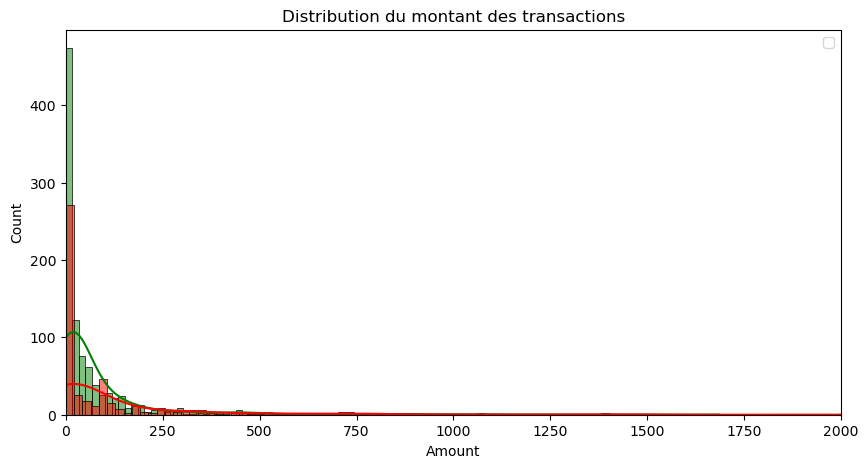

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(df_select[df_select['Class'] == 0]['Amount'], bins=100, color='green', kde=True)
sns.histplot(df_select[df_select['Class'] == 1]['Amount'], bins=100, color='red', kde=True)
plt.legend()
plt.title('Distribution du montant des transactions')
plt.xlim([0, 2000])  # pour lisibilité
plt.show()

C:\Users\aboub\AppData\Local\Temp\ipykernel_31528\3604191785.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


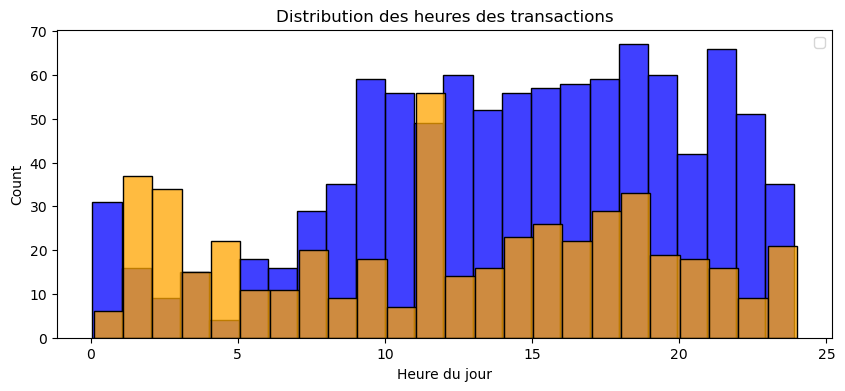

In [57]:
# Convertir 'Time' en heures (si souhaité)
df_select['Hour'] = (df_select['Time'] / 3600) % 24

plt.figure(figsize=(10, 4))
sns.histplot(df_select[df_select['Class'] == 0]['Hour'], bins=24, color='blue', kde=False)
sns.histplot(df_select[df_select['Class'] == 1]['Hour'], bins=24, color='orange', kde=False)
plt.legend()
plt.title('Distribution des heures des transactions')
plt.xlabel('Heure du jour')
plt.show()


In [59]:
from sklearn.preprocessing import StandardScaler

df['Amount_scaled'] = StandardScaler().fit_transform(df[['Amount']])
df['Time_scaled'] = StandardScaler().fit_transform(df[['Time']])

df_model = df.drop(columns=['Time', 'Amount', 'Class', 'Hour'])  # on garde Class à part pour l’évaluation
y_true = df['Class']

print("Colonnes utilisées pour le modèle :", df_model.columns.tolist())

Colonnes utilisées pour le modèle : ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_scaled', 'Time_scaled']


In [61]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

X = df_model.values
# Initialiser le modèle
iso_forest = IsolationForest(n_estimators=100, contamination=0.0017, random_state=42)

# Entraînement
iso_forest.fit(X)

# Prédictions
y_pred = iso_forest.predict(X)  # valeurs : -1 (anomalie), 1 (normal)

# Conversion en 0/1
y_pred = np.where(y_pred == -1, 1, 0)

In [63]:
# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
print("Matrice de confusion :\n", cm)

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_true, y_pred, digits=4))

Matrice de confusion :
 [[283965    350]
 [   357    135]]

Rapport de classification :
              precision    recall  f1-score   support

           0     0.9987    0.9988    0.9988    284315
           1     0.2784    0.2744    0.2764       492

    accuracy                         0.9975    284807
   macro avg     0.6385    0.6366    0.6376    284807
weighted avg     0.9975    0.9975    0.9975    284807



In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction en 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# DataFrame pour visualisation
viz_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'True Class': y_true,
    'Predicted': y_pred
})

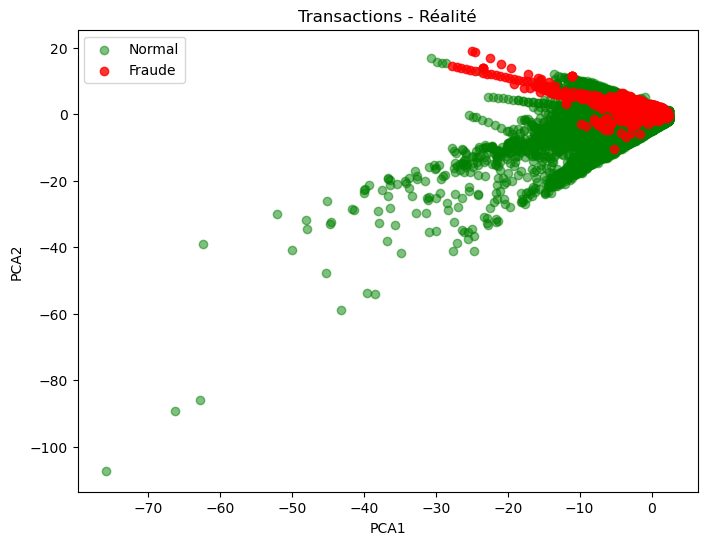

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(
    viz_df[viz_df['True Class'] == 0]['PCA1'],
    viz_df[viz_df['True Class'] == 0]['PCA2'],
    c='green', label='Normal', alpha=0.5
)
plt.scatter(
    viz_df[viz_df['True Class'] == 1]['PCA1'],
    viz_df[viz_df['True Class'] == 1]['PCA2'],
    c='red', label='Fraude', alpha=0.8
)
plt.title('Transactions - Réalité')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

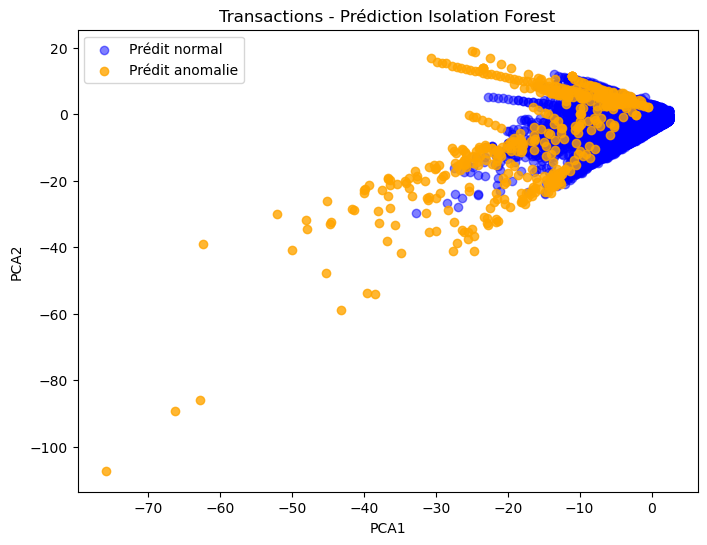

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(
    viz_df[viz_df['Predicted'] == 0]['PCA1'],
    viz_df[viz_df['Predicted'] == 0]['PCA2'],
    c='blue', label='Prédit normal', alpha=0.5
)
plt.scatter(
    viz_df[viz_df['Predicted'] == 1]['PCA1'],
    viz_df[viz_df['Predicted'] == 1]['PCA2'],
    c='orange', label='Prédit anomalie', alpha=0.8
)
plt.title('Transactions - Prédiction Isolation Forest')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [75]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# --- Titre ---
st.title("💳 Détection de fraudes bancaires")
st.write("Application de détection d'anomalies avec Isolation Forest")

# --- Upload du fichier ---
uploaded_file = st.file_uploader("📂 Uploadez votre fichier CSV", type=["csv"])

if uploaded_file is not None:
    # Lecture des données
    df = pd.read_csv(uploaded_file)

    st.subheader("Aperçu des données")
    st.write(df.head())

    # Prétraitement (comme dans ton notebook)
    df['Amount_scaled'] = StandardScaler().fit_transform(df[['Amount']])
    df['Time_scaled'] = StandardScaler().fit_transform(df[['Time']])
    features = df.drop(columns=['Time', 'Amount', 'Class'], errors='ignore')

    # --- Modélisation ---
    contamination_rate = st.slider("Taux d'anomalies estimé", 0.0001, 0.01, 0.0017)
    model = IsolationForest(n_estimators=100, contamination=contamination_rate, random_state=42)
    model.fit(features)
    df['Anomaly'] = model.predict(features)
    df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})  # 1 = anomalie, 0 = normal

    st.subheader("Résultats de la détection")
    st.write(df['Anomaly'].value_counts())

    # --- Graphique interactif ---
    if 'PCA1' not in df.columns:
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(features)
        df['PCA1'], df['PCA2'] = pca_result[:,0], pca_result[:,1]

    fig = px.scatter(
        df, x='PCA1', y='PCA2',
        color=df['Anomaly'].map({0: "Normal", 1: "Anomalie"}),
        title="Visualisation des anomalies détectées"
    )
    st.plotly_chart(fig)

    # --- Export ---
    st.download_button(
        label="📥 Télécharger les résultats",
        data=df.to_csv(index=False).encode('utf-8'),
        file_name="transactions_avec_anomalies.csv",
        mime='text/csv'
    )
else:
    st.info("Veuillez uploader un fichier CSV pour commencer.")
